In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pwd

'/content'

In [0]:
cd gdrive/

/content/gdrive


In [0]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import scipy.ndimage as ndi

filename = 'Khaki.wav'
#files = librosa.util.find_files('/content/gdrive/My Drive', ext='wav')
y, sample_rate = librosa.core.load(filename, sr=11025, duration=60)
sr=16000
# compute the spectrogram magnitude and phase 
S_full, phase = librosa.magphase(librosa.stft(y))
print("S_full = ", S_full)
# print(len(y))
# print("spec = ", librosa.stft(y))
# print(y.shape)

idx = slice(*librosa.time_to_frames([0, 5], sr=16000))
print("idx = ", idx)
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

mask = S_full > 0.005

print(mask)
print (S_full[mask])


In [0]:
pip install soundfile

In [0]:
pip install lium-diarization-editor

In [0]:
from __future__ import print_function
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sys

mic1, sr1 = librosa.load("overlap_mic1.wav")
mic2, sr2 = librosa.load("overlap_mic2.wav")
print("mic1 = ", mic1)
# print("mic1 shape = ",mic1.shape)
# print("mic2 shape = ",mic2.shape)

S_1, phase = librosa.magphase(librosa.stft(mic1))
S_2, phase = librosa.magphase(librosa.stft(mic2))
# print("S_1 = ",S_1)
# print("S_1 shape = ",S_1.shape)
# print("diff shape = ",diff.shape)

# print("S_2 = ",S_2)
mic2_inv = mic2*(-1)
diff = ((mic1) - (mic2_inv))
x = np.linspace(0, 8.5, len(diff))
plt.axis([0, 8.5, 0, 3])
plt.plot(x,diff)
plt.plot(x,mic1)
plt.plot(x,mic2)

# plt.subplot(3, 1, 1)
# plt.plot(x,mic1)
# plt.subplot(3, 1, 2)
# plt.plot(x,mic2)
# plt.subplot(3,1,3)
# plt.plot(x,diff)
print("diff = ", diff)
count=0
np.set_printoptions(threshold=sys.maxsize)
np.isclose(diff, mic1, rtol=1e-04, atol=1e-08)
np.isclose(diff, mic2, rtol=1e-04, atol=1e-08)

# for i in range(len(diff)):
#   if abs(diff[i] - mic1[i]) >= 1e-04:
#     count+=1
#     # print("error")

# print("count = ", count)

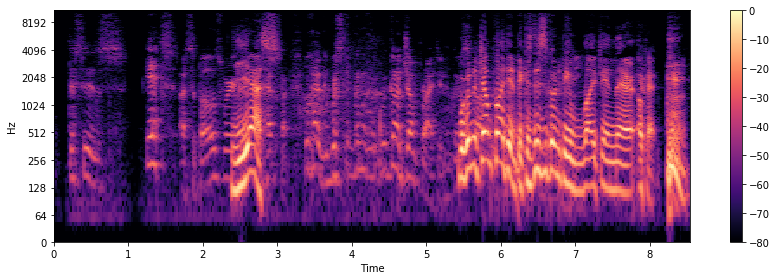

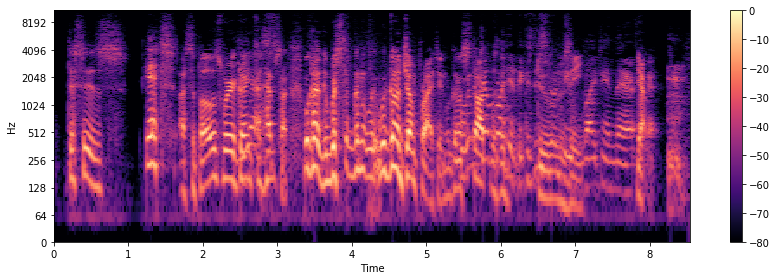

In [0]:
y, sr = librosa.load("short_sample.wav", duration=10)
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(mic1))
m, n = S_full.shape
#my_filter = np.ones((m,n))
#my_filter[m/10:,:] = 0
#S_full = np.multiply(S_full, my_filter)

idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

S_full, phase = librosa.magphase(librosa.stft(mic2))
#m,  = S_full.shape
#my_filter = np.ones((m,n))
#my_filter[m/10:,:] = 0
#S_full = np.multiply(S_full, my_filter)

idx = slice(*librosa.time_to_frames([0, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [0]:
!pip install tensorflow-gpu==2.0

In [0]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [0]:
import tensorflow 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
from tensorflow.keras import layers, utils, Model
import tensorflow.keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Add, Activation, Flatten
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

class DNN():

  def __init__(self, kernel_initializer, kernel_regularizer, gamma_initializer,
               dropout, epsilon, weight_decay, momentum):

    self.kernel_regularizer = kernel_regularizer
    self.kernel_initializer = kernel_initializer
    self.gamma_initializer = gamma_initializer
    self.dropout = dropout
    self.epsilon = epsilon
    self.weight_decay = weight_decay
    self.momentum = momentum
  
  def build_block(self, inputs, num_filters, kernel, dilation, name, padding_dim1, 
                  padding_dim2=None):

    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    if padding_dim2 != None:
      x = ZeroPadding2D(padding=(padding_dim1, padding_dim2))(inputs)
    else:
      x = ZeroPadding2D(padding=(padding_dim1))(inputs)
    x = Conv2D(filters=num_filters, kernel_size=kernel, padding='same',strides=(1, 1), 
                    activation='relu', name=name, dilation_rate=dilation)(x)
    x = BatchNormalization(axis=channel_axis, momentum=self.momentum, 
                              epsilon=self.epsilon,
                              gamma_initializer=self.gamma_initializer,
                              beta_initializer='zeros')(x)
    return x                      

  def build_model(self, inputs):

    channel_axis = 1 if K.image_data_format() == "channels_first" else -1

    #cnn1
    x = self.build_block(inputs, 64, (1, 7), (1, 1), 'conv_1',(3, 3), (0, 0))
    
    # cnn2
    x = self.build_block(x, 64, (7, 1), (1, 1), 'conv_2',(0, 0), (3, 3))

    # cnn3
    x = self.build_block(x, 64, (5, 5), (1, 1), 'conv_3',2)

    # cnn4
    x = self.build_block(x, 64, (5, 5), (2, 1), 'conv_4',(2, 2), (4, 4))

    # cnn5
    x = self.build_block(x, 64, (5, 5), (4, 1), 'conv_5',(2, 2), (8, 8))
  
    # cnn6
    x = self.build_block(x, 64, (5, 5), (8, 1), 'conv_6',(2, 2), (16, 16))

    # cnn7
    x = self.build_block(x, 64, (5, 5), (16, 1), 'conv_7',(2, 2), (32, 32))
  
    # cnn8
    x = Conv2D(filters=64, kernel_size=(1, 1), padding='same',strides=(1, 1), 
                    activation='relu', name='conv_8', dilation_rate=(1, 1))(x)
    x = AveragePooling2D((8, 8))(x)
    # TODO: check if this is needed !!
    x = Flatten()(x)
    x = BatchNormalization(axis=channel_axis, momentum=self.momentum, 
                              epsilon=self.epsilon,
                              gamma_initializer=self.gamma_initializer,
                              beta_initializer='zeros')(x)

    model = Model(inputs, x)
    return model

if __name__ == "__main__":
  print("******STARTING BUILDING THE NETWORK******")

  """Create an input, build the model, print the network summary"""
  dnn = DNN('he_normal', 0.0002, 'uniform', 0.7, 1e-5, 0.0005, 0.1)
  inputs = Input(shape=(224, 224, 3), name='input_layer')
  dnn = dnn.build_model(inputs)
  
  # Print the model summary
  dnn.summary()


******STARTING BUILDING THE NETWORK******
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d_77 (ZeroPaddi (None, 230, 224, 3)       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 230, 224, 64)      1408      
_________________________________________________________________
batch_normalization_81 (Batc (None, 230, 224, 64)      256       
_________________________________________________________________
zero_padding2d_78 (ZeroPaddi (None, 230, 230, 64)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 230, 230, 64)      28736     
_________________________________________________________________
batch_normalizati